# **Image Classification on FMNIST dataset using keras**

#Import libraries & Load the Dataset

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
mnist= tf.keras.datasets.fashion_mnist
mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

#Train-Test Split

In [ ]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


In [ ]:
train_x

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
test_x.shape

(10000, 28, 28)

In [ ]:
train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
labels= pd.DataFrame({'label':train_y})
labels.head()

,label
0,9
1,0
2,0
3,3
4,0


In [ ]:
label_counts=labels['label'].value_counts()
for i in range(len(label_counts)):
  label=class_names[label_counts.index[i]]
  count=label_counts.values[i]
  print("{:<20s}:   {}".format(label, count))

Ankle boot          :   6000
Bag                 :   6000
Sneaker             :   6000
Shirt               :   6000
Sandal              :   6000
Coat                :   6000
Dress               :   6000
Pullover            :   6000
Trouser             :   6000
T-shirt/top         :   6000


In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0

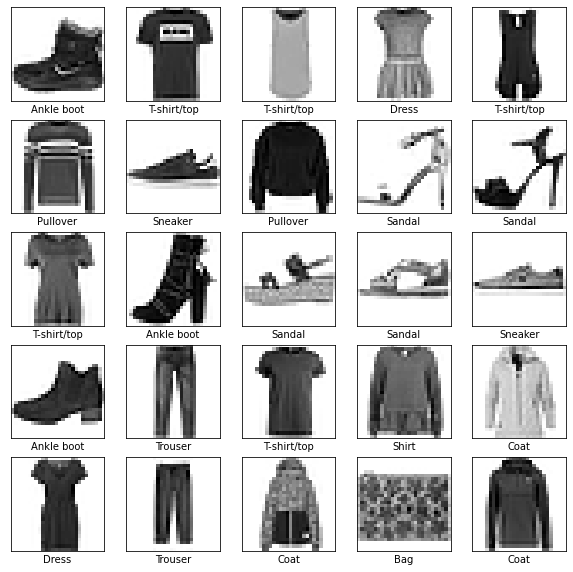

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_x[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_y[i]])
plt.show()

#Create Neural Network

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#Training the model

In [ ]:
history= model.fit(train_x,train_y,epochs=20,validation_split=0.2,verbose=1)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5787 - accuracy: 0.7958 - val_loss: 0.4216 - val_accuracy: 0.8505
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4343 - accuracy: 0.8421 - val_loss: 0.3937 - val_accuracy: 0.8585
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3982 - accuracy: 0.8548 - val_loss: 0.3677 - val_accuracy: 0.8676
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3741 - accuracy: 0.8650 - val_loss: 0.3501 - val_accuracy: 0.8724
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3571 - accuracy: 0.8703 - val_loss: 0.3502 - val_accuracy: 0.8707
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3442 - accuracy: 0.8743 - val_loss: 0.3324 - val_accuracy: 0.8798
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3361 - accuracy: 0.8766 - val_loss: 0.3361 - val_accuracy:

#Model Analysis

In [ ]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
    iplot(fig, filename='accuracy-loss')


In [ ]:
plot_accuracy_and_loss(history)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3450799882411957
Test accuracy: 0.8822000026702881


#Prediction

In [ ]:
pred= model.predict(test_x)

In [ ]:
pred[0]

array([3.0188012e-09, 8.5258696e-11, 4.6218243e-10, 6.8985886e-11,
       3.5810146e-12, 2.3148474e-03, 3.9912112e-11, 7.4047958e-03,
       1.8336543e-10, 9.9028033e-01], dtype=float32)

In [ ]:
np.argmax(pred[0])

9

In [ ]:
test_y[0]

9

In [ ]:
predicted_classes = model.predict_classes(test_x)
predicted_classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([9, 2, 1, ..., 8, 1, 5])

#Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
result=confusion_matrix(predicted_classes,test_y)
result

array([[805,   1,  12,   9,   0,   0, 102,   0,   5,   1],
       [  3, 968,   1,   7,   0,   0,   1,   0,   0,   0],
       [ 17,   2, 785,   7,  88,   0,  85,   0,   3,   0],
       [ 29,  23,  16, 895,  24,   0,  30,   0,   6,   0],
       [  6,   3, 113,  39, 829,   0,  76,   0,   3,   0],
       [  0,   0,   0,   0,   0, 963,   1,  18,   4,   5],
       [126,   2,  72,  35,  58,   0, 690,   0,   5,   0],
       [  0,   0,   0,   0,   0,  24,   0, 962,   4,  39],
       [ 14,   1,   1,   8,   1,   2,  15,   0, 970,   0],
       [  0,   0,   0,   0,   0,  11,   0,  20,   0, 955]])

In [ ]:
report=classification_report(test_y, predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.79      0.79      1000
           3       0.87      0.90      0.88      1000
           4       0.78      0.83      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.70      0.69      0.69      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.97      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



#Verification

In [ ]:
def plot_image_value(i,predictions_array,true_label,img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  plt.show()
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()

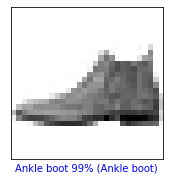

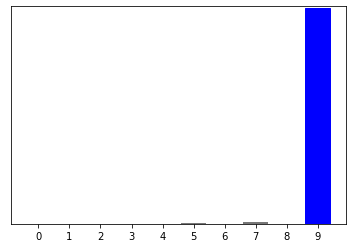

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image_value(i, pred[i], test_y, test_x)

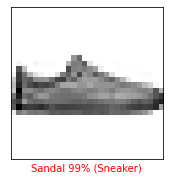

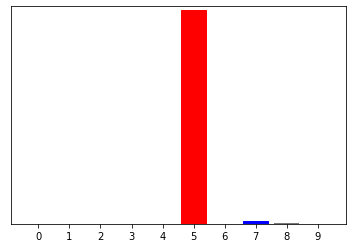

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image_value(i, pred[i], test_y, test_x)